<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/lecturadecvsopendatacvsfiles-ManuelPerezOrt/blob/main/LeyendoCSVDelOpendataDelCMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algunos de los archivos para educación del CMS con datos abiertos están en un formato CSV. Este formato es un formato de texto sencillo en donde cada evento se guarda en columnas y cada columna correspende a una variable cinemática reconstruida con el detector. Se puede encontrar un ejemplo de esta liga
https://opendata.cern.ch/record/5208.
En partícular estos datos presentan las variables cinemáticas de dos muones producto final de la colisión protón-protón. Las variables se pueden determinar usando los cuadrimomentos de las partículas (https://es.wikipedia.org/wiki/Cuadrimomento)

Usamos panda para leer con python el archivo CSV.

In [ ]:
#panda nos permite manipular el archivo csv https://pandas.pydata.org
import pandas as pd
#numpy nos permite hacer operaciones usando vectores https://numpy.org
import numpy as np
#plotly nos permite crear graficas interactivas https://plotly.com/python/
import plotly.express as px
%matplotlib inline
#usamos la liga que está directamente en la página.
particles = pd.read_csv('https://opendata.cern.ch/record/5208/files/Zmumu.csv',delimiter=',')
particles.head()


,Run,Event,pt1,eta1,phi1,Q1,dxy1,iso1,pt2,eta2,phi2,Q2,dxy2,iso2
0,165617,74969122,54.7055,-0.4324,2.5742,1,-0.0745,0.4999,34.2464,-0.9885,-0.4987,-1,0.0712,3.4221
1,165617,75138253,24.5872,-2.0522,2.8666,-1,-0.0554,0.0000,28.5389,0.3852,-1.9912,1,0.0515,0.0000
2,165617,75887636,31.7386,-2.2595,-1.3323,-1,0.0879,0.0000,30.2344,-0.4684,1.8833,1,-0.0876,0.0000
3,165617,75779415,39.7394,-0.7123,-0.3123,1,0.0585,0.0000,48.2790,-0.1956,2.9703,-1,-0.0492,0.0000
4,165617,75098104,41.2998,-0.1571,-3.0408,1,-0.0305,1.2280,43.4508,0.5910,-0.0428,-1,0.0442,0.0000


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Event'].plot(kind='hist', bins=20, title='Event')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['pt1'].plot(kind='hist', bins=20, title='pt1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['eta1'].plot(kind='hist', bins=20, title='eta1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Event', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Event', y='pt1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='pt1', y='eta1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='eta1', y='phi1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Event']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Event')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['pt1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('pt1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['eta1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('eta1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['phi1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('phi1')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Event'].plot(kind='line', figsize=(8, 4), title='Event')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['pt1'].plot(kind='line', figsize=(8, 4), title='pt1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['eta1'].plot(kind='line', figsize=(8, 4), title='eta1')
plt.gca().spines[['top', 'right']].set_visible(False)

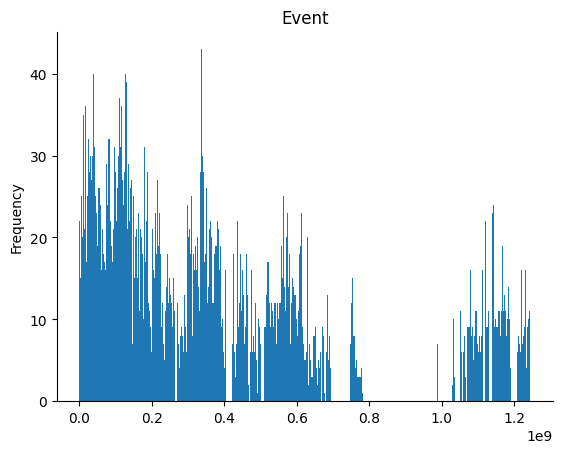

In [ ]:
# @title Event

from matplotlib import pyplot as plt
particles['Event'].plot(kind='hist', bins=1000, title='Event')
plt.gca().spines[['top', 'right',]].set_visible(False)

Los nombres de las columnas se refieren a las variables que describen a llos dos muones. Corrida (Etiqueta del haz), Número de evento (colisión), Momento Transverso del primer muon, Eta del primer muón, Phi del primer muón, Carga del primer muón, distancia al vertice, lo mismo para el segundo muon y finalmente la variable de aislamiento que se relaciona con la energía de las trazas que rodean al muon.

In [ ]:
#función para reconstruir la masa invariante de las dos partículas. Usamos la definición encontrada https://en.wikipedia.org/wiki/Invariant_mass
def mtransversa(pt1,pt2,eta1,eta2,phi1,phi2):
  return np.sqrt(2*pt1*pt2*(np.cosh(eta2-eta1)-np.cos(phi1-phi2)))

#Se usan los nombres de las columnas del archivo como parámetros para usar la función que calcula la masa transversa.
mtransv=mtransversa(particles['pt1'],particles['pt2'],particles['eta1'],particles['eta2'],particles['phi1'],particles['phi2'])

#Se crea y se grafica el histograma.
fig_5=px.histogram(mtransv,mtransv)
fig_5.update_layout(title=r"$\text{Masa invariante} \ M, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [ ]:
pt1=particles['pt1']
#Se crea y se grafica el histograma.
fig_5=px.histogram(pt1,pt1)
fig_5.update_layout(title=r"$\text{Momento Transverso del Primer Muon} \ Pt_1, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [ ]:
pt2=particles['pt2']
#Se crea y se grafica el histograma.
fig_5=px.histogram(pt2,pt2)
fig_5.update_layout(title=r"$\text{Momento Transverso del Segundo Muon} \ Pt_2, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()

In [ ]:
eta1=particles['eta1']
#Se crea y se grafica el histograma.
fig_5=px.histogram(eta1,eta1)
fig_5.update_layout(title=r"$\text{La pseudorrapidez del primer muón} \ eta_1, \ \text{%d bins}$" %1000,
                    xaxis_title=r"$GeV$",yaxis_title="Eventos")
fig_5.show()